In [1]:
import pandas as pd

In [46]:
df=pd.read_csv('/Users/abdihakin/Desktop/Hamoye/FoodBalanceSheets_E_Africa_NOFLAG.csv' ,encoding='ISO-8859-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [47]:
df.shape

(60943, 12)

# Q1:What is the total sum of Animal Fat produced in 2014 and 2017 respectively?

In [101]:
df.groupby('Item').get_group('Animal fats').sum()[['Y2014','Y2017']]

Y2014    209460.54
Y2017    269617.53
dtype: object

Insight: he total sum of Animal Fat produced in 2014 and 2017 are209460.54 and 269617.53 respectively

# Q2: What is the mean and standard deviation across the whole dataset for the year 2015 to 3 decimal places?

In [103]:
df.describe()['Y2015']

count     59395.000000
mean        135.235966
std        1603.403984
min       -3161.000000
25%           0.000000
50%           0.080000
75%           8.460000
max      181137.000000
Name: Y2015, dtype: float64

insight: the mean and standard deviation across the whole dataset for the year 2015 to 3 decimal place are 135.236 and  1603.404 Respectively

# Q3: What is the total number and percentage of missing data in 2016 to 2 decimal places?



In [107]:
df['Y2016'].isnull().sum(),df.isnull()['Y2016'].sum()/df.Y2016.shape[0]*100

(1535, 2.5187470259094566)

The total number and percentage of missing data in 2016 to 2 decimal place are 1535, 2.519 Respectively

# Q4: Which year had the highest correlation with ‘Element Code’? 

In [111]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [108]:
df.corr(method ='pearson').T

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


insight: year 2014 had the highest correlation with Element Code.

#  Q5: What year has the highest sum of Import Quantity?

<AxesSubplot:>

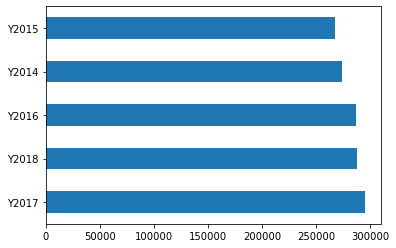

In [120]:
df.groupby('Element').get_group('Import Quantity')[['Y2014','Y2015','Y2016','Y2017','Y2018']].sum().sort_values(ascending=False).plot(kind='barh')

Insight: 2017  has the highest sum of Import Quantity

# Q6 What is the total number of the sum of Production in 2014?

In [127]:
df.groupby('Element').get_group('Production').sum()['Y2014']

1931287.75

insght: the total number of the sum of Production in 2014 was 1931287.75

# Which of these elements had the highest sum in 2018?
* Import quantity

* Domestic supply quantity

* Food supply (k/cal/capita/day)

* Food supply quantity (kg/capita/yr)


In [133]:
df.groupby('Element').sum()['Y2018'].sort_values(ascending=False)

Element
Domestic supply quantity                  2161192.10
Production                                2075072.89
Food                                      1303841.28
Total Population - Both sexes             1140605.00
Food supply (kcal/capita/day)              455261.00
Processing                                 308429.00
Import Quantity                            287997.09
Feed                                       233489.68
Export Quantity                            181594.80
Losses                                     163902.00
Other uses (non-food)                       91300.97
Food supply quantity (kg/capita/yr)         49056.85
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Protein supply quantity (g/capita/day)      11833.56
Fat supply quantity (g/capita/day)          10258.69
Tourist consumption                            90.00
Name: Y2018, dtype: float64

 Insight: Domestic supply quantity  had the highest sum in 2018 of 2161192.10

# Q7: Which of these elements had the 3rd lowest sum in 2018?

In [134]:
df.groupby('Element').sum()['Y2018'].sort_values(ascending=True)

Element
Tourist consumption                            90.00
Fat supply quantity (g/capita/day)          10258.69
Protein supply quantity (g/capita/day)      11833.56
Stock Variation                             20577.91
Seed                                        25263.14
Residuals                                   34864.00
Food supply quantity (kg/capita/yr)         49056.85
Other uses (non-food)                       91300.97
Losses                                     163902.00
Export Quantity                            181594.80
Feed                                       233489.68
Import Quantity                            287997.09
Processing                                 308429.00
Food supply (kcal/capita/day)              455261.00
Total Population - Both sexes             1140605.00
Food                                      1303841.28
Production                                2075072.89
Domestic supply quantity                  2161192.10
Name: Y2018, dtype: float64

Insight: Protein supply quantity (g/capita/day) had the 3rd lowest sum in 2018 of only  11833.56

# Q 8: What is the total Import Quantity in Algeria in 2018?

In [145]:
df.groupby('Area').get_group('Algeria').query("Element=='Import Quantity'")['Y2018'].sum()

36238.29

insight: the total Import Quantity in Algeria in 2018 was 36238.29

# Q9: What is the total number of unique countries in the dataset

# 

In [94]:
len(df.Area.unique())

49

                 *******  END *********